<!-- dom:TITLE: PHY321: Review of Vectors, Math and first Numerical Examples for simple Motion Problems -->
# PHY321: Review of Vectors, Math and first Numerical Examples for simple Motion Problems
<!-- dom:AUTHOR: [Morten Hjorth-Jensen](http://mhjgit.github.io/info/doc/web/) at Department of Physics and Astronomy and Facility for Rare Ion Beams (FRIB), Michigan State University, USA & Department of Physics, University of Oslo, Norway -->
<!-- Author: -->  
**[Morten Hjorth-Jensen](http://mhjgit.github.io/info/doc/web/)**, Department of Physics and Astronomy and Facility for Rare Ion Beams (FRIB), Michigan State University, USA and Department of Physics, University of Oslo, Norway

Date: **Jan 20, 2021**

Copyright 1999-2021, [Morten Hjorth-Jensen](http://mhjgit.github.io/info/doc/web/). Released under CC Attribution-NonCommercial 4.0 license




## Aims and Overarching Motivation

### Wednesday

On Wednesday the 20th we will mainly go through the overview material from week 2, January 11-15.  See the learning material fro week 2 at for example <https://mhjensen.github.io/Physics321/doc/pub/week2/html/week2-bs.html>.

### Friday

We start studying the problem of a  falling object and use this to introduce numerical aspects.

## Falling baseball in one dimension

We anticipate the mathematical model to come and assume that we have a
model for the motion of a falling baseball without air resistance.
Our system (the baseball) is at an initial height $y_0$ (which we will
specify in the program below) at the initial time $t_0=0$. In our program example here we will plot the position in steps of $\Delta t$ up to a final time $t_f$. 
The mathematical formula for the position $y(t)$ as function of time $t$ is

$$
y(t) = y_0-\frac{1}{2}gt^2,
$$

where $g=9.80665=0.980655\times 10^1$m/s${}^2$ is a constant representing the standard acceleration due to gravity.
We have here adopted the conventional standard value. This does not take into account other effects, such as buoyancy or drag.
Furthermore, we stop when the ball hits the ground, which takes place at

$$
y(t) = 0= y_0-\frac{1}{2}gt^2,
$$

which gives us a final time $t_f=\sqrt{2y_0/g}$. 

As of now we simply assume that   we know the formula for the falling object. Afterwards, we will derive it.

## Our Python Encounter

We start with preparing folders for storing our calculations, figures and if needed, specific data files we use as input or output files.

In [6]:
%matplotlib inline

# Common imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

# Where to save the figures and data files
PROJECT_ROOT_DIR = "Results"
FIGURE_ID = "Results/FigureFiles"
DATA_ID = "DataFiles/"

if not os.path.exists(PROJECT_ROOT_DIR):
    os.mkdir(PROJECT_ROOT_DIR)

if not os.path.exists(FIGURE_ID):
    os.makedirs(FIGURE_ID)

if not os.path.exists(DATA_ID):
    os.makedirs(DATA_ID)

def image_path(fig_id):
    return os.path.join(FIGURE_ID, fig_id)

def data_path(dat_id):
    return os.path.join(DATA_ID, dat_id)

def save_fig(fig_id):
    plt.savefig(image_path(fig_id) + ".png", format='png')

#in case we have an input file we wish to read in
#infile = open(data_path("MassEval2016.dat"),'r')

You could also define a function for making our plots. You
can obviously avoid this and simply set up various **matplotlib**
commands every time you need them. You may however find it convenient
to collect all such commands in one function and simply call this
function.

In [7]:
from pylab import plt, mpl
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'

def MakePlot(x,y, styles, labels, axlabels):
    plt.figure(figsize=(10,6))
    for i in range(len(x)):
        plt.plot(x[i], y[i], styles[i], label = labels[i])
        plt.xlabel(axlabels[0])
        plt.ylabel(axlabels[1])
    plt.legend(loc=0)

Thereafter we start setting up the code for the falling object.

t[s]       y[m]
0    0.0  10.000000
1    0.1   9.950967
2    0.2   9.803869
3    0.3   9.558705
4    0.4   9.215476
5    0.5   8.774181
6    0.6   8.234821
7    0.7   7.597395
8    0.8   6.861904
9    0.9   6.028347
10   1.0   5.096725
11   1.1   4.067037
12   1.2   2.939284
13   1.3   1.713465
14   1.4   0.389581

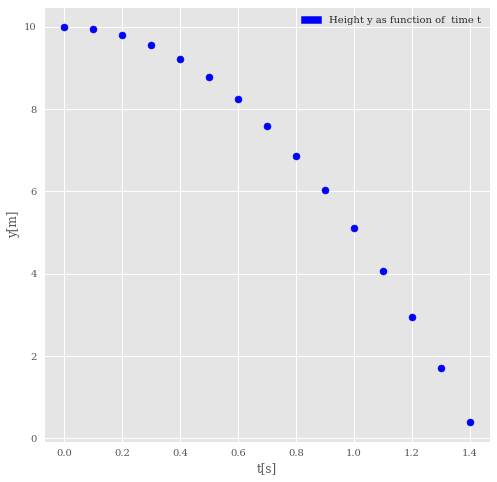

In [8]:
import numpy as np
%matplotlib inline
import matplotlib.patches as mpatches

g = 9.80655 #m/s^2
y_0 = 10.0 # initial position in meters
DeltaT = 0.1  # time step
# final time when y = 0, t = sqrt(2*10/g)
tfinal = np.sqrt(2.0*y_0/g)
#set up arrays 
t = np.arange(0,tfinal,DeltaT)
y =y_0 -g*.5*t**2
# Then make a nice printout in table form using Pandas
import pandas as pd
from IPython.display import display
data = {'t[s]': t,
        'y[m]': y
        }
RawData = pd.DataFrame(data)
display(RawData)
plt.style.use('ggplot')
plt.figure(figsize=(8,8))
plt.scatter(t, y, color = 'b')
blue_patch = mpatches.Patch(color = 'b', label = 'Height y as function of  time t')
plt.legend(handles=[blue_patch])
plt.xlabel("t[s]")
plt.ylabel("y[m]")
save_fig("FallingBaseball")
plt.show()

Here we used **pandas** (see below) to systemize the output of the position as function of time.


## Average quantities
We define now the average velocity as

$$
\overline{v}(t) = \frac{y(t+\Delta t)-y(t)}{\Delta t}.
$$

In the code we have set the time step $\Delta t$ to a given value. We could define it in terms of the number of points $n$ as

$$
\Delta t = \frac{t_{\mathrm{final}-}t_{\mathrm{initial}}}{n+1}.
$$

Since we have discretized the variables, we introduce the counter $i$ and let $y(t)\rightarrow y(t_i)=y_i$ and $t\rightarrow t_i$
with $i=0,1,\dots, n$. This gives us the following shorthand notations that we will use for the rest of this course. We define

$$
y_i = y(t_i),\hspace{0.2cm} i=0,1,2,\dots,n.
$$

This applies to other variables which depend on say time. Examples are the velocities, accelerations, momenta etc.
Furthermore we use the shorthand

$$
y_{i\pm 1} = y(t_i\pm \Delta t),\hspace{0.12cm} i=0,1,2,\dots,n.
$$

## Compact equations
We can then rewrite in a more compact form the average velocity as

$$
\overline{v}_i = \frac{y_{i+1}-y_{i}}{\Delta t}.
$$

The velocity is defined as the change in position per unit time.
In the limit $\Delta t \rightarrow 0$ this defines the instantaneous velocity, which is nothing but the slope of the position at a time $t$.
We have thus

$$
v(t) = \frac{dy}{dt}=\lim_{\Delta t \rightarrow 0}\frac{y(t+\Delta t)-y(t)}{\Delta t}.
$$

Similarly, we can define the average acceleration as the change in velocity per unit time as

$$
\overline{a}_i = \frac{v_{i+1}-v_{i}}{\Delta t},
$$

resulting in the instantaneous acceleration

$$
a(t) = \frac{dv}{dt}=\lim_{\Delta t\rightarrow 0}\frac{v(t+\Delta t)-v(t)}{\Delta t}.
$$

**A note on notations**: When writing for example the velocity as $v(t)$ we are then referring to the continuous and instantaneous value. A subscript like
$v_i$ refers always to the discretized values.

## A differential equation
We can rewrite the instantaneous acceleration as

$$
a(t) = \frac{dv}{dt}=\frac{d}{dt}\frac{dy}{dt}=\frac{d^2y}{dt^2}.
$$

This forms the starting point for our definition of forces later. It is a famous second-order differential equation. If the acceleration is constant we can now recover the formula for the falling ball we started with.
The acceleration can depend on the position and the velocity. To be more formal we should then write the above differential equation as

$$
\frac{d^2y}{dt^2}=a(t,y(t),\frac{dy}{dt}).
$$

With given initial conditions for $y(t_0)$ and $v(t_0)$ we can then
integrate the above equation and find the velocities and positions at
a given time $t$.

If we multiply with mass, we have one of the famous expressions for Newton's second law,

$$
F(y,v,t)=m\frac{d^2y}{dt^2}=ma(t,y(t),\frac{dy}{dt}),
$$

where $F$ is the force acting on an object with mass $m$. We see that it also has the right dimension, mass times length divided by time squared.
We will come back to this soon.

## Integrating our equations

Formally we can then, starting with the acceleration (suppose we have measured it, how could we do that?)
compute say the height of a building.  To see this we perform the following integrations from an initial time $t_0$  to a given time $t$

$$
\int_{t_0}^t dt a(t) = \int_{t_0}^t dt \frac{dv}{dt} = v(t)-v(t_0),
$$

or as

$$
v(t)=v(t_0)+\int_{t_0}^t dt a(t).
$$

When we know the velocity as function of time, we can find the position as function of time starting from the defintion of velocity as the derivative with respect to time, that is we have

$$
\int_{t_0}^t dt v(t) = \int_{t_0}^t dt \frac{dy}{dt} = y(t)-y(t_0),
$$

or as

$$
y(t)=y(t_0)+\int_{t_0}^t dt v(t).
$$

These equations define what is called the integration method for
finding the position and the velocity as functions of time. There is
no loss of generality if we extend these equations to more than one
spatial dimension.

## Constant acceleration case, the velocity
Let us compute the velocity using the constant value for the acceleration given by $-g$. We have

$$
v(t)=v(t_0)+\int_{t_0}^t dt a(t)=v(t_0)+\int_{t_0}^t dt (-g).
$$

Using our initial time as $t_0=0$s and setting the initial velocity $v(t_0)=v_0=0$m/s we get when integrating

$$
v(t)=-gt.
$$

The more general case is

$$
v(t)=v_0-g(t-t_0).
$$

We can then integrate the velocity and obtain the final formula for the position as function of time through

$$
y(t)=y(t_0)+\int_{t_0}^t dt v(t)=y_0+\int_{t_0}^t dt v(t)=y_0+\int_{t_0}^t dt (-gt),
$$

With $y_0=10$m and $t_0=0$s, we obtain the equation we started with

$$
y(t)=10-\frac{1}{2}gt^2.
$$

## Computing the averages
After this mathematical background we are now ready to compute the mean velocity using our data.

In [4]:
# Now we can compute the mean velocity using our data
# We define first an array Vaverage
n = np.size(t)
Vaverage = np.zeros(n)
for i in range(1,n-1):
    Vaverage[i] = (y[i+1]-y[i])/DeltaT
# Now we can compute the mean accelearatio using our data
# We define first an array Aaverage
n = np.size(t)
Aaverage = np.zeros(n)
Aaverage[0] = -g
for i in range(1,n-1):
    Aaverage[i] = (Vaverage[i+1]-Vaverage[i])/DeltaT
data = {'t[s]': t,
        'y[m]': y,
        'v[m/s]': Vaverage,
        'a[m/s^2]': Aaverage
        }
NewData = pd.DataFrame(data)
display(NewData[0:n-2])

t[s]       y[m]     v[m/s]  a[m/s^2]
0    0.0  10.000000   0.000000  -9.80655
1    0.1   9.950967  -1.470982  -9.80655
2    0.2   9.803869  -2.451638  -9.80655
3    0.3   9.558705  -3.432292  -9.80655
4    0.4   9.215476  -4.412948  -9.80655
5    0.5   8.774181  -5.393602  -9.80655
6    0.6   8.234821  -6.374258  -9.80655
7    0.7   7.597395  -7.354913  -9.80655
8    0.8   6.861904  -8.335567  -9.80655
9    0.9   6.028347  -9.316222  -9.80655
10   1.0   5.096725 -10.296878  -9.80655
11   1.1   4.067037 -11.277533  -9.80655
12   1.2   2.939284 -12.258187  -9.80655

Note that we don't print the last values! 



## Including Air Resistance in our model

In our discussions till now of the falling baseball, we have ignored
air resistance and simply assumed that our system is only influenced
by the gravitational force.  We will postpone the derivation of air
resistance till later, after our discussion of Newton's laws and
forces.

For our discussions here it suffices to state that the accelerations is now modified to

$$
\boldsymbol{a}(t) = -g +D\boldsymbol{v}(t)\vert v(t)\vert,
$$

where $\vert v(t)\vert$ is the absolute value of the velocity and $D$ is a constant which pertains to the specific object we are studying.
Since we are dealing with motion in one dimension, we can simplify the above to

$$
a(t) = -g +Dv^2(t).
$$

We can rewrite this as a differential equation

$$
a(t) = \frac{dv}{dt}=\frac{d^2y}{dt^2}= -g +Dv^2(t).
$$

Using the integral equations discussed above we can integrate twice
and obtain first the velocity as function of time and thereafter the
position as function of time.

For this particular case, we can actually obtain an analytical
solution for the velocity and for the position. Here we will first
compute the solutions analytically, thereafter we will derive Euler's
method for solving these differential equations numerically.

## Analytical solutions

For simplicity let us just write $v(t)$ as $v$. We have

$$
\frac{dv}{dt}= -g +Dv^2(t).
$$

We can solve this using the technique of separation of variables. We
isolate on the left all terms that involve $v$ and on the right all
terms that involve time. We get then

$$
\frac{dv}{g -Dv^2(t) }= -dt,
$$

We scale now the equation to the left by introducing a constant
$v_T=\sqrt{g/D}$. This constant has dimension length/time. Can you
show this?

Next we integrate the left-hand side (lhs) from $v_0=0$ m/s to $v$ and
the right-hand side (rhs) from $t_0=0$ to $t$ and obtain

$$
\int_{0}^v\frac{dv}{g -Dv^2(t) }= \frac{v_T}{g}\mathrm{arctanh}(\frac{v}{v_T})  =-\int_0^tdt = -t.
$$

We can reorganize these equations as

$$
v_T\mathrm{arctanh}(\frac{v}{v_T})  =-gt,
$$

which gives us $v$ as function of time

$$
v(t)=v_T\tanh{-(\frac{gt}{v_T})}.
$$

## Finding the final height
With the velocity we can then find the height $y(t)$ by integrating yet another time, that is

$$
y(t)=y(t_0)+\int_{t_0}^t dt v(t)=\int_{0}^t dt[v_T\tanh{-(\frac{gt}{v_T})}].
$$

This integral is a little bit trickier but we can look it up in a table over 
known integrals and we get

$$
y(t)=y(t_0)-\frac{v_T^2}{g}\log{[\cosh{(\frac{gt}{v_T})}]}.
$$

Alternatively we could have used the symbolic Python package **Sympy**  (example will be inserted later). 

In most cases however, we need to revert to numerical solutions. 


## Our first attempt at solving differential equations

Here we will try the simplest possible approach to solving the second-order differential 
equation

$$
a(t) =\frac{d^2y}{dt^2}= -g +Dv^2(t).
$$

We rewrite it as two coupled first-order equations (this is a standard approach)

$$
\frac{dy}{dt} = v(t),
$$

with initial condition $y(t_0)=y_0$ and

$$
a(t) =\frac{dv}{dt}= -g +Dv^2(t),
$$

with initial condition $v(t_0)=v_0$.

Many of the algorithms for solving differential equations start with simple Taylor equations.
If we now Taylor expand $y$ and $v$ around a value $t+\Delta t$ we have

$$
y(t+\Delta t) = y(t)+\Delta t \frac{dy}{dt}+\frac{\Delta t^2}{2!} \frac{d^2y}{dt^2}+O(\Delta t^3),
$$

and

$$
v(t+\Delta t) = v(t)+\Delta t \frac{dv}{dt}+\frac{\Delta t^2}{2!} \frac{d^2v}{dt^2}+O(\Delta t^3).
$$

Using the fact that $dy/dt = v$ and $dv/dt=a$ and keeping only terms up to $\Delta t$ we have

$$
y(t+\Delta t) = y(t)+\Delta t v(t)+O(\Delta t^2),
$$

and

$$
v(t+\Delta t) = v(t)+\Delta t a(t)+O(\Delta t^2).
$$

## Discretizing our equations

Using our discretized versions of the equations with for example
$y_{i}=y(t_i)$ and $y_{i\pm 1}=y(t_i+\Delta t)$, we can rewrite the
above equations as (and truncating at $\Delta t$)

$$
y_{i+1} = y_i+\Delta t v_i,
$$

and

$$
v_{i+1} = v_i+\Delta t a_i.
$$

These are the famous Euler equations (forward Euler).

To solve these equations numerically we start at a time $t_0$ and simply integrate up these equations to a final time $t_f$,
The step size $\Delta t$ is an input  parameter in our code.
You can define it directly in the code below as

In [9]:
DeltaT = 0.1

With a given final time **tfinal**  we can then find the number of integration points via the **ceil** function included in the **math** package of Python
as

In [10]:
#define final time, assuming that initial time is zero
from math import ceil
tfinal = 0.5
n = ceil(tfinal/DeltaT)
print(n)

5


The **ceil** function returns the smallest integer not less than the input in say

In [11]:
x = 21.15
print(ceil(x))

22


which in the case here is 22.

In [8]:
x = 21.75
print(ceil(x))

22


which also yields 22. The  **floor** function in the **math** package
is used to return the closest integer value which is less than or equal to the specified expression or value.
Compare the previous result to the usage of **floor**

In [9]:
from math import floor
x = 21.75
print(floor(x))

21


Alternatively, we can define ourselves the number of integration(mesh) points. In this case we could have

In [10]:
n = 10
tinitial = 0.0
tfinal = 0.5
DeltaT = (tfinal-tinitial)/(n)
print(DeltaT)

0.05


Since we will set up one-dimensional arrays that contain the values of
various variables like time, position, velocity, acceleration etc, we
need to know the value of $n$, the number of data points (or
integration or mesh points).  With $n$ we can initialize a given array
by setting all elelements to zero, as done here

In [11]:
# define array a
a = np.zeros(n)
print(a)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


## Code for implementing Euler's method
In the code here we implement this simple Eurler scheme choosing a value for $D=0.0245$ m/s.

In [12]:
# Common imports
import numpy as np
import pandas as pd
from math import *
import matplotlib.pyplot as plt
import os

# Where to save the figures and data files
PROJECT_ROOT_DIR = "Results"
FIGURE_ID = "Results/FigureFiles"
DATA_ID = "DataFiles/"

if not os.path.exists(PROJECT_ROOT_DIR):
    os.mkdir(PROJECT_ROOT_DIR)

if not os.path.exists(FIGURE_ID):
    os.makedirs(FIGURE_ID)

if not os.path.exists(DATA_ID):
    os.makedirs(DATA_ID)

def image_path(fig_id):
    return os.path.join(FIGURE_ID, fig_id)

def data_path(dat_id):
    return os.path.join(DATA_ID, dat_id)

def save_fig(fig_id):
    plt.savefig(image_path(fig_id) + ".png", format='png')


g = 9.80655 #m/s^2
D = 0.00245 #m/s
DeltaT = 0.1
#set up arrays 
tfinal = 0.5
n = ceil(tfinal/DeltaT)
# define scaling constant vT
vT = sqrt(g/D)
# set up arrays for t, a, v, and y and we can compare our results with analytical ones
t = np.zeros(n)
a = np.zeros(n)
v = np.zeros(n)
y = np.zeros(n)
yanalytic = np.zeros(n)
# Initial conditions
v[0] = 0.0  #m/s
y[0] = 10.0 #m
yanalytic[0] = y[0]
# Start integrating using Euler's method
for i in range(n-1):
    # expression for acceleration
    a[i] = -g + D*v[i]*v[i]
    # update velocity and position
    y[i+1] = y[i] + DeltaT*v[i]
    v[i+1] = v[i] + DeltaT*a[i]
    # update time to next time step and compute analytical answer
    t[i+1] = t[i] + DeltaT
    yanalytic[i+1] = y[0]-(vT*vT/g)*log(cosh(g*t[i+1]/vT))
    if ( y[i+1] < 0.0):
        break
a[n-1] = -g + D*v[n-1]*v[n-1]
data = {'t[s]': t,
        'y[m]': y-yanalytic,
        'v[m/s]': v,
        'a[m/s^2]': a
        }
NewData = pd.DataFrame(data)
display(NewData)
#finally we plot the data
fig, axs = plt.subplots(3, 1)
axs[0].plot(t, y, t, yanalytic)
axs[0].set_xlim(0, tfinal)
axs[0].set_ylabel('y and exact')
axs[1].plot(t, v)
axs[1].set_ylabel('v[m/s]')
axs[2].plot(t, a)
axs[2].set_xlabel('time[s]')
axs[2].set_ylabel('a[m/s^2]')
fig.tight_layout()
save_fig("EulerIntegration")
plt.show()

Try different values for $\Delta t$ and study the difference between the exact solution and the numerical solution.

## Simple extension, the Euler-Cromer method

The Euler-Cromer method is a simple variant of the standard Euler
method. We use the newly updated velocity $v_{i+1}$ as an input to the
new position, that is, instead of

$$
y_{i+1} = y_i+\Delta t v_i,
$$

and

$$
v_{i+1} = v_i+\Delta t a_i,
$$

we use now the newly calculate for $v_{i+1}$ as input to $y_{i+1}$, that is 
we compute first

$$
v_{i+1} = v_i+\Delta t a_i,
$$

and then

$$
y_{i+1} = y_i+\Delta t v_{i+1},
$$

Implementing the Euler-Cromer method yields a simple change to the previous code. We only need to change the following line in the loop over time
steps

In [13]:
for i in range(n-1):
    # more codes in between here
    v[i+1] = v[i] + DeltaT*a[i]
    y[i+1] = y[i] + DeltaT*v[i+1]
    # more code

In [15]:
import numpy as np
from math import cos, sin,pi
#We define a  3 dimensional vector with random numbers
n = 3
a = np.array([1,0,0])
# define a matrix of dimension 3 x 3 and set all elements to random numbers with x \in [0, 1]
#R = np.random.rand(n, n)
theta = 30.0*pi/180.0
c = cos(theta)
s = sin(theta)
R = np.array([[c,s,0],[-s,c,0],[0,0,1]])
#print the vector and the matrix
print(a)
print(R)
# perform a matrix-vector multiplication. Note that we need to transpose the vector and the odd way to indicate a multiplication with @
b = R @ a.T
print(b)

[1 0 0]
[[ 0.8660254  0.5        0.       ]
 [-0.5        0.8660254  0.       ]
 [ 0.         0.         1.       ]]
[ 0.8660254 -0.5        0.       ]
